# Capestone Project

**Project:** Real-time face-mask detection for automatic door opening using Convolutional Neural Network

**Group Number:** 11

**Group members present (Name, ID):**

- Manisha Manisha (0753208)
- Pranav Jai Prasad (0754284)
- Prathyash Prasanthan (0753820)


Loading packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

# We need to import layers from keras to use different neural network layers. We can also import different layers individually as well.
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization, Activation

# Now we can import 'Sequential' model from keras, which is the base model in which we are adding the layers
from tensorflow.keras.models import Sequential

Defining the data directory and the folder names / categories

In [2]:
data_dir = os.getcwd()+'\\data\\'
data_cat = ["with_mask", "without_mask"]
data_dir

'C:\\Users\\prath\\Desktop\\Capstone\\Week 6\\data\\'

Checking the number of files in each folders

In [3]:
for folders in os.listdir(data_dir):    
    #Storing each folder directory names
    folder_dir = data_dir+'\\'+folders
    
    # Getting the details of sub directories and files, Our main objective here is to check the number of files
    path, dirs, files = next(os.walk(folder_dir))
    file_count = len(files)
    print(folders.title()+' set, '+folders+' :'+str(file_count))

Without_Mask set, without_mask :3828
With_Mask set, with_mask :3725


In [4]:
batch_size = 40
target_size=(148, 148)

In [5]:
# Train Data
training_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset= "training",
    seed=1,
    image_size= target_size,
    batch_size=batch_size, 
    color_mode='grayscale'
)


## Test Data
testing_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset= "validation",
    seed=1,
    image_size= target_size,
    batch_size=batch_size, 
    color_mode='grayscale'
)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.
Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


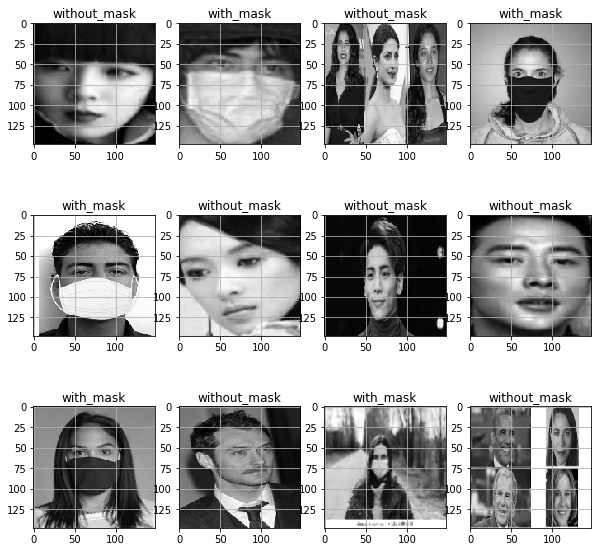

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    # The grayscale data loaded will be in 3 dimension in shape (148, 148, 1). To display it, we need to reshape it to 2 dimension
    plt.imshow(images[i].numpy().reshape(148, 148), cmap="gray")
    plt.title(data_cat[labels[i]])
    plt.grid(True)

In [7]:
def cnn_model_init():
    
    input_shape = (148, 148, 1)    
    
    cnnModel = Sequential()
    
    cnnModel.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu'))
    cnnModel.add(BatchNormalization())
    cnnModel.add(MaxPooling2D(pool_size=(2, 2)))
    cnnModel.add(Dropout(0.4))
    
    cnnModel.add(Flatten())
    cnnModel.add(Dense(32, activation='relu'))  
    cnnModel.add(Dropout(0.4))
        
    cnnModel.add(Dense(1, activation='sigmoid'))
    return cnnModel

In [8]:
cnnModel = cnn_model_init()

cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 146, 146, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                10913824  
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [9]:
cnnModel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
history = cnnModel.fit(
    training_ds,
    epochs=15,
    validation_data=testing_ds)

Epoch 1/15
152/152 [==============================] - 141s 922ms/step - loss: 13.9912 - accuracy: 0.5681 - val_loss: 0.6254 - val_accuracy: 0.6179
Epoch 2/15
152/152 [==============================] - 142s 936ms/step - loss: 0.6186 - accuracy: 0.6111 - val_loss: 0.5986 - val_accuracy: 0.6854
Epoch 3/15
152/152 [==============================] - 148s 973ms/step - loss: 0.6103 - accuracy: 0.6497 - val_loss: 0.5193 - val_accuracy: 0.6881
Epoch 4/15
152/152 [==============================] - 149s 981ms/step - loss: 0.5530 - accuracy: 0.6521 - val_loss: 0.7000 - val_accuracy: 0.7060
Epoch 5/15
152/152 [==============================] - 152s 996ms/step - loss: 0.4963 - accuracy: 0.7174 - val_loss: 0.4740 - val_accuracy: 0.8007
Epoch 6/15
152/152 [==============================] - 152s 998ms/step - loss: 0.4484 - accuracy: 0.7429 - val_loss: 0.5089 - val_accuracy: 0.7974
Epoch 7/15
152/152 [==============================] - 150s 986ms/step - loss: 0.4108 - accuracy: 0.7616 - val_loss: 0.4653 

PLOTTING ACCURACY



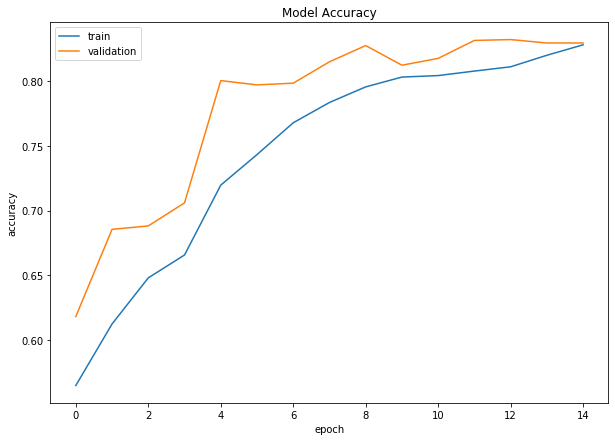

PLOTTING LOSS



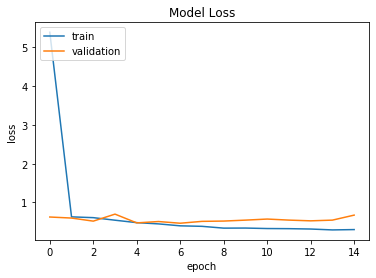

In [11]:
plt.figure(figsize=(10,7))

print("PLOTTING ACCURACY\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


print("PLOTTING LOSS\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()
print("\n\n")

In [12]:
cnnModel.save("maskDetectorCNN.model", save_format="h5")

## References : 

   1. [Image classification from scratch](https://keras.io/examples/vision/image_classification_from_scratch/)